#Ejercicio datasets IRIS

##Importando librerias y dataset

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error

###Cargamos los datos del dataset

In [ ]:
db_iris = load_iris()

In [ ]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)
#imprimiento datos del target
print(db_iris.target)

Verificando si hay datos nulos

In [ ]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

###Convirtiendo el dataset en un dataframe

In [ ]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###Generando el arbol y entrenando

Instanciamos el arbol

In [ ]:
arbol = DecisionTreeClassifier()

Dividimos los datos(Train y test)

In [ ]:
#dividiremos el dataset en  70% (train) y 30% (test)
x_train, x_test, y_train, y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'],test_size=0.3, random_state=0)

Entrenamos

In [ ]:
arbol.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Graficamos para ver la profundidad optima

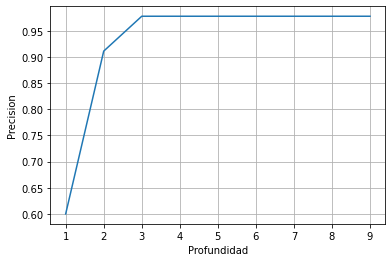

In [ ]:
max_depth_lista = list(range(1, 10))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(x_train, y_train)
    score = arbol_clasi.score(x_test, y_test)
    accuracy.append(score)

# Graficamos los resultados 

plt.plot(max_depth_lista,accuracy)
plt.ylabel('Precision')
plt.xlabel('Profundidad')
plt.grid(True)
plt.show()

Precicion 

In [ ]:
arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

arbol_clasi.fit(x_train, y_train)

accuary = arbol_clasi.score(x_test, y_test)
#calcular la precisión (accuary) del algoritmo
print("Precision: "+str(accuary*100)+" %")
print("Puntaje del entrenamiento: ", arbol_clasi.score(x_train,y_train)*100,"%\n\n")

print("\t\tDatos recolectados del entrenamiento\n")
y_pred = arbol_clasi.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred),"\n")



Precision: 97.77777777777777 %
Puntaje del entrenamiento:  98.09523809523809 %


		Datos recolectados del entrenamiento

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]] 



Generando el arbol

In [ ]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

Como conclusion use el metodo de arboles de decicion ya que probe con linal y logistica y con este metodo fue el que pude obtener un porcentaje mayor del 97% es decir que la IA es optima y no esta sobre cargada

#Ejercicio dataset Salary_Data

In [22]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/Salary_Data.csv")
df.head(5)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

##Creando matriz correlacion

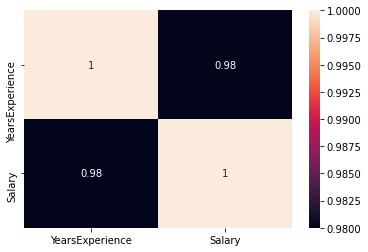

In [3]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = df.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

##Graficando datos

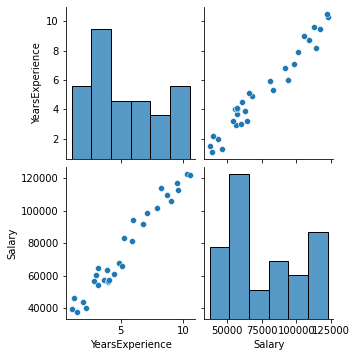

In [5]:
sns.pairplot(df)

##Graficando datos seleccionados

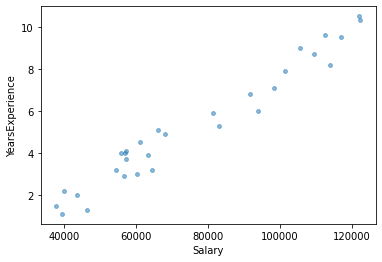

In [7]:
X = df['Salary']
y = df['YearsExperience']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

##Entrenamiento

In [13]:
#entrenando con dos variables en X
x = pd.DataFrame(np.c_[df['Salary']], columns = ['Salary'])
y = df['YearsExperience']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=20)

print("x80% para entrenamiento: "+str(X_train.shape) +", x20% para test:  "+str(X_test.shape))
print("y80% para entrenamiento: "+str(Y_train.shape) +", y20% para test: "+str(Y_test.shape))

x80% para entrenamiento: (24, 1), x20% para test:  (6, 1)
y80% para entrenamiento: (24,), y20% para test: (6,)


In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Graficando los datos una vez entrenado

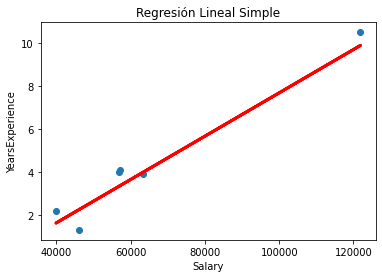


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.9568762774706462


In [18]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['Salary'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

###Evaluando modelo para test y train

In [20]:
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 0.5594991460446694
R2 resultado es 0.9568762774706462


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 0.6616756450434083
R2 resultado es 0.9496121236164643


##Aplicando la regresion linal

In [26]:
regressor = LinearRegression()
#entrenamos
regressor.fit(X_train, Y_train)
#predecimos
pred = regressor.predict(X_test)

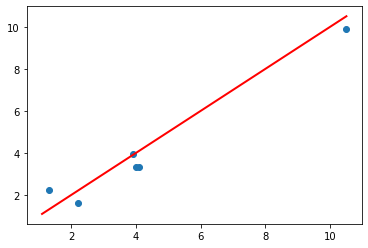

Precisión del modelo: 0.9496121236164643


In [29]:
#visualizar la predicción en los datos de testeo
plt.scatter(Y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(X_test, Y_test)))

##Conclusion

Como conclusion use el metodo de regresion lineal ya que una ves graficado podemos observar en la seccion "Graficando datos" la grafica el cual nos muestra una clara regresion lineal, y finalizando obtuve una precisiob del modelo del 94% el cual es optimo para una IA